In [1]:
import pandas as pd
import numpy as np

dataset_test = pd.read_csv("TOP-STOCKS/MSFT(Microsoft).csv")

In [2]:
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,27.250000,27.730000,27.150000,27.620001,22.774685,52899300
1,2013-01-03,27.629999,27.650000,27.160000,27.250000,22.469593,48294400
2,2013-01-04,27.270000,27.340000,26.730000,26.740000,22.049057,52521100
3,2013-01-07,26.770000,26.879999,26.639999,26.690001,22.007826,37110400
4,2013-01-08,26.750000,26.790001,26.459999,26.549999,21.892389,44703100
...,...,...,...,...,...,...,...
2513,2022-12-23,236.110001,238.869995,233.940002,238.729996,238.729996,21207000
2514,2022-12-27,238.699997,238.929993,235.830002,236.960007,236.960007,16688600
2515,2022-12-28,236.889999,239.720001,234.169998,234.529999,234.529999,17457100
2516,2022-12-29,235.649994,241.919998,235.649994,241.009995,241.009995,19770700


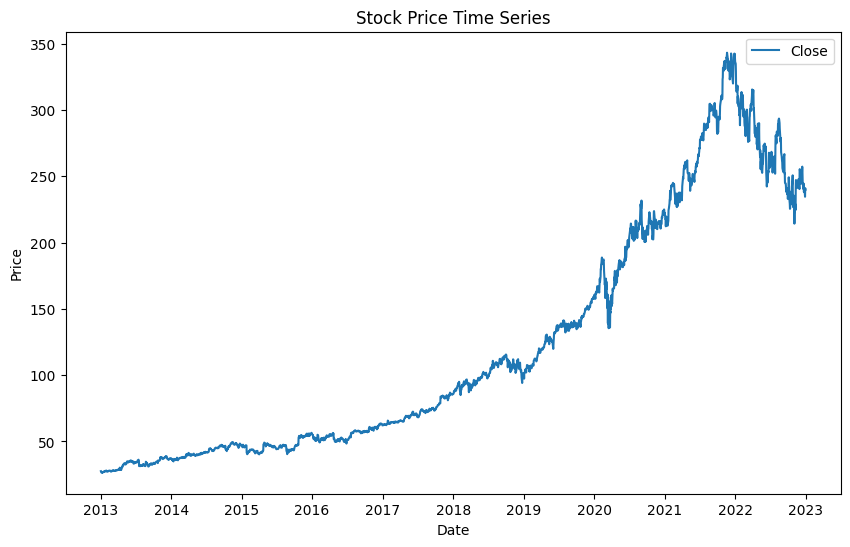

In [3]:
import matplotlib.pyplot as plt

dataset_test['datetime'] = pd.to_datetime(dataset_test['Date'])

dataset_test.set_index('datetime', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(dataset_test.index, dataset_test['Close'], label='Close')


plt.title('Stock Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()


In [4]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [5]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [6]:
from copy import deepcopy as dc

data = dataset_test[['Date', 'Close']]

def prep_dataframe(df, n_steps):
    df = dc(df)
    df.set_index('Date', inplace = True)

    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)
        df.dropna(inplace=True)

    return df

shifted = prep_dataframe(data, 15)
shifted

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7),Close(t-8),Close(t-9),Close(t-10),Close(t-11),Close(t-12),Close(t-13),Close(t-14),Close(t-15)
Date,,,,,,,,,,,,,,,,
2013-06-25,33.669998,33.720001,33.270000,33.490002,34.590000,34.980000,35.000000,34.400002,34.720001,35.000000,34.840000,35.470001,35.669998,34.959999,34.779999,34.990002
2013-06-26,34.349998,33.669998,33.720001,33.270000,33.490002,34.590000,34.980000,35.000000,34.400002,34.720001,35.000000,34.840000,35.470001,35.669998,34.959999,34.779999
2013-06-27,34.619999,34.349998,33.669998,33.720001,33.270000,33.490002,34.590000,34.980000,35.000000,34.400002,34.720001,35.000000,34.840000,35.470001,35.669998,34.959999
2013-06-28,34.540001,34.619999,34.349998,33.669998,33.720001,33.270000,33.490002,34.590000,34.980000,35.000000,34.400002,34.720001,35.000000,34.840000,35.470001,35.669998
2013-07-01,34.360001,34.540001,34.619999,34.349998,33.669998,33.720001,33.270000,33.490002,34.590000,34.980000,35.000000,34.400002,34.720001,35.000000,34.840000,35.470001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,238.729996,238.190002,244.429993,241.800003,240.449997,244.690002,249.009995,257.220001,256.920013,252.509995,245.419998,247.399994,244.369995,245.119995,250.199997,255.020004
2022-12-27,236.960007,238.729996,238.190002,244.429993,241.800003,240.449997,244.690002,249.009995,257.220001,256.920013,252.509995,245.419998,247.399994,244.369995,245.119995,250.199997
2022-12-28,234.529999,236.960007,238.729996,238.190002,244.429993,241.800003,240.449997,244.690002,249.009995,257.220001,256.920013,252.509995,245.419998,247.399994,244.369995,245.119995


In [7]:
shifted_np = shifted.to_numpy()

In [8]:
scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_np = scaler.fit_transform(shifted_np)
shifted_np

array([[-0.98384409, -0.98352352, -0.98640851, ..., -0.9755738 ,
        -0.97672779, -0.97538145],
       [-0.97948456, -0.98384409, -0.98352352, ..., -0.97102194,
        -0.9755738 , -0.97672779],
       [-0.97775356, -0.97948456, -0.98384409, ..., -0.97230413,
        -0.97102194, -0.9755738 ],
       ...,
       [ 0.30388517,  0.31946414,  0.33081168, ...,  0.38639572,
         0.36697016,  0.37177847],
       [ 0.34542893,  0.30388517,  0.31946414, ...,  0.37370181,
         0.38639572,  0.36697016],
       [ 0.33779983,  0.34542893,  0.30388517, ...,  0.41915634,
         0.37370181,  0.38639572]])

In [9]:
x = shifted_np[:,1:]
y = shifted_np[:, 0]

In [10]:
x = dc(np.flip(x, axis=1))
x

array([[-0.97538145, -0.97672779, -0.9755738 , ..., -0.98499806,
        -0.98640851, -0.98352352],
       [-0.97672779, -0.9755738 , -0.97102194, ..., -0.98640851,
        -0.98352352, -0.98384409],
       [-0.9755738 , -0.97102194, -0.97230413, ..., -0.98352352,
        -0.98384409, -0.97948456],
       ...,
       [ 0.37177847,  0.36697016,  0.38639572, ...,  0.32734974,
         0.33081168,  0.31946414],
       [ 0.36697016,  0.38639572,  0.37370181, ...,  0.33081168,
         0.31946414,  0.30388517],
       [ 0.38639572,  0.37370181,  0.41915634, ...,  0.31946414,
         0.30388517,  0.34542893]])

In [11]:
split_indx = int(len(x) * 0.9)
split_indx

2158

In [12]:
x_train = x[:split_indx]
x_test = x[split_indx:]

y_train = y[:split_indx]
y_test = y[split_indx:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2158, 15), (2158,), (240, 15), (240,))

In [13]:
# LSTMs precisam de uma dimensão extra no final para propósitos de reshape

x_train = x_train.reshape((-1, 15, 1))
x_test = x_test.reshape((-1, 15, 1))

y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

x_train.shape, y_train.shape, x_test.shape, y_test.shape


((2158, 15, 1), (2158, 1), (240, 15, 1), (240, 1))

In [14]:
x_train = torch.tensor(x_train).float()
x_test = torch.tensor(x_test).float()
y_train = torch.tensor(y_train).float()
y_test = torch.tensor(y_test).float()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

(torch.Size([2158, 15, 1]),
 torch.Size([2158, 1]),
 torch.Size([240, 15, 1]),
 torch.Size([240, 1]))

In [15]:
from torch.utils.data import Dataset

class SerieTemporal(Dataset):
    def __init__(self, x, y):
        self.x = x  
        self.y = y

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, i):
        return self.x[i], self.y[i]

train_dataset = SerieTemporal(x_train, y_train)
test_dataset = SerieTemporal(x_test, y_test)

train_dataset

In [16]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [17]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 15, 1]) torch.Size([16, 1])


In [18]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, stacked_layers):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.stack_layers = stacked_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers= stacked_layers, batch_first=True)
        self.inter = nn.Linear(hidden_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.stack_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.stack_layers, batch_size, self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [19]:
input_size = 1  # Number of inputs
hidden_size = 64  # Number of LSTM units
output_size = 1  # Number of output units (Close)
stacked_layers = 5

model = LSTMModel(input_size, hidden_size, output_size, stacked_layers)
model.to(device)
model

LSTMModel(
  (lstm): LSTM(1, 64, num_layers=5, batch_first=True)
  (inter): Linear(in_features=64, out_features=64, bias=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [20]:
lr_rate = 0.001
n_epochs = 50

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr_rate)

In [21]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch {epoch+1}')
    running_loss = 0.0

    for indx, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = criterion(output, y_batch)
        running_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if indx % 100 == 99:
            avg_loss = running_loss/100
            print(f'Batch {indx+1}, loss {avg_loss}')
            running_loss = 0.0
    print()

In [22]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for indx, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    
        with torch.no_grad():
            output = model(x_batch)
            loss = criterion(output, y_batch)
            running_loss += loss
        
    avg_loss = running_loss / len(test_loader)
    print('Val Loss: ', avg_loss)
    print('***********************************')
    print()

In [23]:
for epoch in range(n_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch 1
Batch 100, loss 0.12274995158863021

Val Loss:  tensor(0.0115)
***********************************

Epoch 2
Batch 100, loss 0.0013453796203248202

Val Loss:  tensor(0.0313)
***********************************

Epoch 3
Batch 100, loss 0.0020389460897422395

Val Loss:  tensor(0.0171)
***********************************

Epoch 4
Batch 100, loss 0.001497689809621079

Val Loss:  tensor(0.0102)
***********************************

Epoch 5
Batch 100, loss 0.0013684535717038671

Val Loss:  tensor(0.0168)
***********************************

Epoch 6
Batch 100, loss 0.0015937918590498157

Val Loss:  tensor(0.0095)
***********************************

Epoch 7
Batch 100, loss 0.0013405455106840236

Val Loss:  tensor(0.0094)
***********************************

Epoch 8
Batch 100, loss 0.0012327506631845608

Val Loss:  tensor(0.0123)
***********************************

Epoch 9
Batch 100, loss 0.0012603345458046533

Val Loss:  tensor(0.0084)
***********************************

Epoch 10
Batc

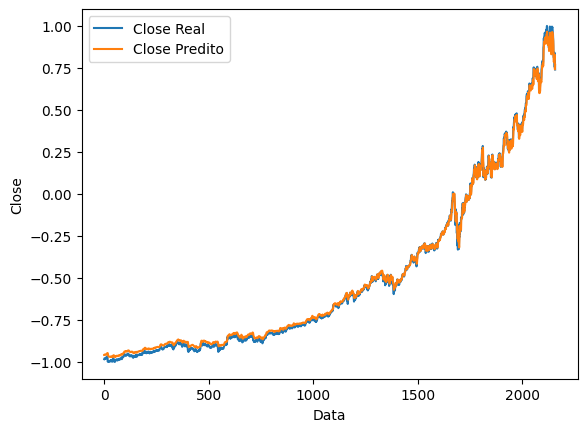

In [24]:
with torch.no_grad():
    predicted = model(x_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Close Real')
plt.plot(predicted, label='Close Predito')
plt.xlabel("Data")
plt.ylabel("Close")
plt.legend()
plt.show()

In [25]:
test_pred = model(x_test.to(device)).detach().cpu().numpy().flatten()
dummie = np.zeros((x_test.shape[0], 16))
dummie[:,0] = test_pred
dummie = scaler.inverse_transform(dummie)

test_pred = dc(dummie[:, 0])
test_pred

array([300.90808993, 301.34297258, 300.04261991, 294.40824179,
       294.45156642, 286.91151796, 294.81129105, 298.90433484,
       306.53463987, 309.05407898, 306.38754064, 310.31792181,
       299.10519008, 302.91958023, 299.38129631, 302.8567874 ,
       309.68665584, 301.26668031, 292.29240048, 292.47583289,
       299.03704211, 298.73300729, 289.07477464, 285.4717269 ,
       285.89268244, 279.00032798, 292.57520994, 296.69740023,
       297.11281469, 292.63605966, 297.45385208, 294.23511059,
       287.78621073, 276.65468016, 273.68742609, 286.94687495,
       285.72581752, 278.499101  , 274.12368471, 284.84311991,
       293.2090977 , 293.76642357, 297.75310817, 296.89226812,
       301.38901198, 297.60985796, 301.65066116, 301.97088228,
       308.56335775, 313.44207428, 311.88212709, 305.68899133,
       306.4580315 , 312.73194074, 309.50115017, 297.08629927,
       298.53873442, 295.47580357, 283.53968989, 279.84820783,
       286.16508841, 279.3367633 , 278.74858024, 283.60

In [26]:
dummies = np.zeros((x_test.shape[0],  16))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)
new_y_test = dc(dummies[:, 0])
new_y_test

array([303.32998353, 301.60001039, 296.02999631, 296.36999243,
       288.48999433, 296.70998855, 299.83999821, 308.26001093,
       310.98000777, 308.76001069, 313.45998985, 301.25000126,
       305.9400046 , 300.9500107 , 304.5599941 , 311.20999093,
       302.38000258, 295.0400098 , 295.00000424, 300.46999977,
       299.50000209, 290.73000814, 287.92999088, 287.71999656,
       280.26999082, 294.58999142, 297.30999756, 298.79000801,
       294.95001356, 300.18999805, 295.92001124, 289.85998252,
       278.91000634, 275.85000408, 288.49999805, 285.58999572,
       280.07000951, 276.44000008, 287.14998939, 294.39001941,
       295.22000228, 300.42999421, 299.16000597, 304.05999434,
       299.48998908, 304.1000092 , 303.67999266, 310.70001534,
       315.41000752, 313.85998036, 308.31000161, 309.42001409,
       314.97000215, 310.88000782, 299.50000209, 301.36999934,
       296.97000144, 285.26001261, 282.05999554, 287.61999661,
       279.82998545, 280.5199907 , 285.29999028, 286.35

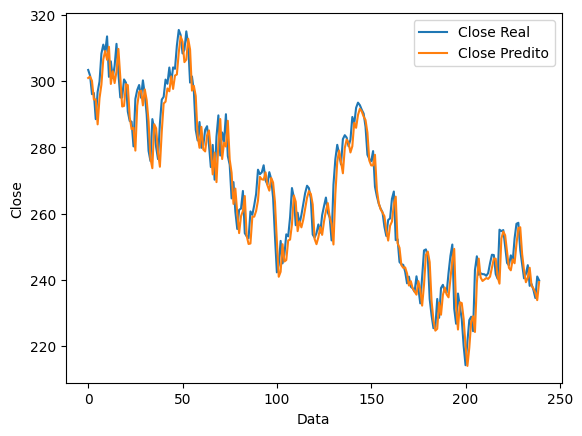

In [27]:
plt.plot(new_y_test, label='Close Real')
plt.plot(test_pred, label='Close Predito')
plt.xlabel("Data")
plt.ylabel("Close")
plt.legend()
plt.show()

In [28]:
model.state_dict()

OrderedDict([('lstm.weight_ih_l0',
              tensor([[-0.1908],
                      [-0.0257],
                      [ 0.0769],
                      [ 0.0775],
                      [-0.1039],
                      [ 0.2002],
                      [ 0.1416],
                      [-0.0596],
                      [ 0.2460],
                      [ 0.0986],
                      [ 0.0236],
                      [ 0.0764],
                      [-0.1017],
                      [ 0.0517],
                      [ 0.0497],
                      [-0.1033],
                      [ 0.0145],
                      [ 0.0725],
                      [-0.0558],
                      [ 0.0154],
                      [ 0.0591],
                      [ 0.0104],
                      [-0.1846],
                      [-0.1775],
                      [ 0.0266],
                      [-0.1644],
                      [-0.0280],
                      [ 0.1433],
                      [ 0.0060],
        

In [29]:
torch.save(model.state_dict(), "modelo-MSFT.pt")

In [30]:
torch.save(model.state_dict(), "modelo-MSFT-complete.pt")

In [43]:
torch.save(x_train, 'test_tensor.pt')